In [1]:

!pip install imblearn 
!pip install nltk
!pip install pandas
!pip install numpy
import pandas as pd
import seaborn as sns
import re
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import re
import pickle

In [3]:
df = pd.read_csv(r"D:\sentiment_tweets3.csv")
df.head(5)
df['message'].iloc[:1]
df.columns
df = df.drop('Unnamed: 0',axis=1)
df

,Index,message,label
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1
10310,802310,What do you do when depression succumbs the br...,1
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,802312,dont mistake a bad day with depression! everyo...,1


<Axes: ylabel='count'>

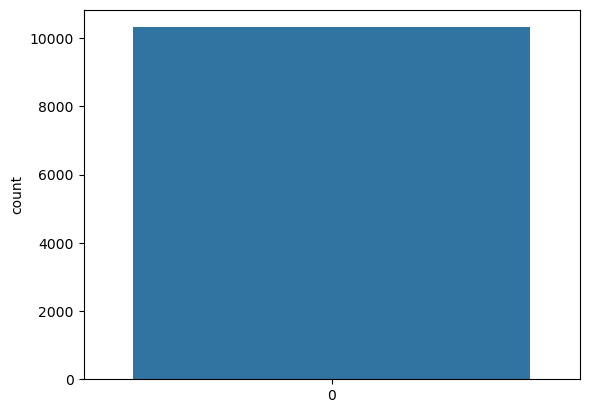

In [4]:
sns.countplot(df['label'])

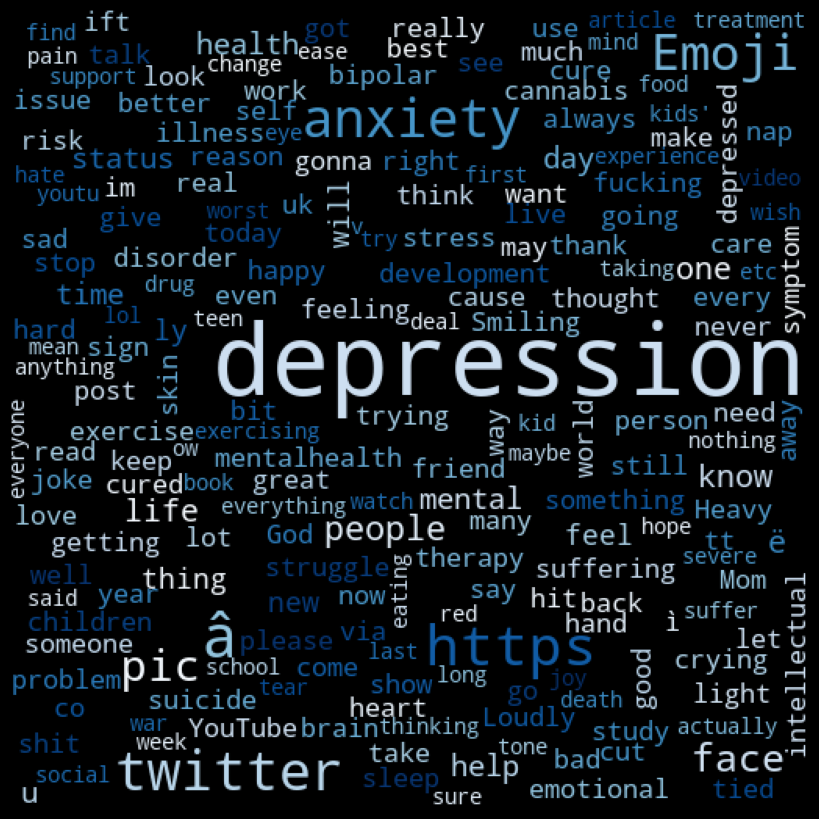

In [5]:
wo = WordNetLemmatizer()
corpus=[]
for i in range(0,len(df)):
    message = re.sub('[^a-zA-Z]',' ',df['message'][i])
    message = message.lower()
    message = message.split()
    message = [wo.lemmatize(word) for word in message ]
    message = ' '.join(message)
    corpus.append(message)
corpus[2]
depressive_words = ' '.join(list(df[df['label'] == 1]['message']))
depressive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(depressive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

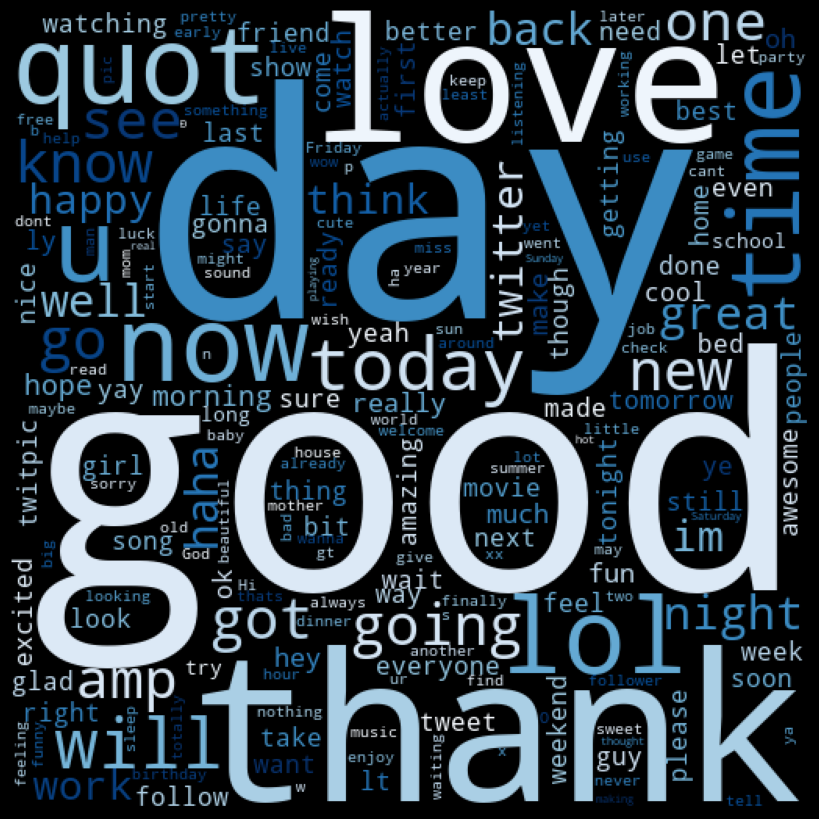

In [6]:
positive_words = ' '.join(list(df[df['label'] == 0]['message']))
positive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(positive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(positive_wc)
plt.axis('off'), 
plt.tight_layout(pad = 0)
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(corpus,df['label'],test_size=0.25,random_state=42)
vectorizer = TfidfVectorizer( ngram_range=(1,3), stop_words='english',max_features=15000)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)
X_train_vect.shape

(7735, 15000)

In [30]:
x_resample, y_resample = SMOTE().fit_resample(X_train_vect, y_train)
x_test_resample, y_test_resample = SMOTE().fit_resample(X_test_vect, y_test)
# lets print the shape of x and y after resampling it
print(x_resample.shape)
print(y_resample.shape)

(11978, 15000)
(11978,)


In [31]:
clf = LogisticRegression(solver='lbfgs')
clf.fit(x_resample,y_resample)
y_pred = clf.predict(x_test_resample)
accuracy_score(y_test_resample,y_pred)
print(classification_report(y_test_resample,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2011
           1       0.99      0.95      0.97      2011

    accuracy                           0.97      4022
   macro avg       0.97      0.97      0.97      4022
weighted avg       0.97      0.97      0.97      4022



In [32]:
mnb = MultinomialNB()
mnb.fit(x_resample,y_resample)
y_pred = mnb.predict(x_test_resample)
accuracy_score(y_test_resample,y_pred)
print(classification_report(y_test_resample,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2011
           1       0.95      0.94      0.95      2011

    accuracy                           0.95      4022
   macro avg       0.95      0.95      0.95      4022
weighted avg       0.95      0.95      0.95      4022



In [45]:
def preprocess(data):
    #preprocess
    a = re.sub('[^a-zA-Z]',' ',data)
    a = a.lower()
    a = a.split()
    a = [wo.lemmatize(word) for word in a ]
    a = ' '.join(a)  
    return a
strr = input('Enter Your Message: ')
print("-------------------------------")
examples = strr
a = preprocess(examples)
example_counts = vectorizer.transform([a])
prediction =mnb.predict(example_counts)
prediction[0]
if prediction[0]==0:
    print('Positive')
elif prediction[0]==1:
    print('Depressive')

Enter Your Message: I am just  fed up of my life and i need to cured
-------------------------------
Depressive
